In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr, class_num])
    return data

In [3]:
train = get_training_data('./chest_xray/train')
test = get_training_data('./chest_xray/test')
val = get_training_data('./chest_xray/val')

In [4]:
print(len(train))
print(len(test))
print(len(val))
# Validation is only 16 images. 

5216
624
16


In [5]:
pneumnoia_count = 0
normal_count = 0
for image in train:
    if(image[1] == 0): # A 0 is the pneumonia class
        pneumnoia_count += 1
    else:
        normal_count += 1

print("Pneumonia Cases: ", pneumnoia_count)
print("Normal Cases: ", normal_count)

Pneumonia Cases:  3875
Normal Cases:  1341


Text(0.5, 1.0, 'NORMAL')

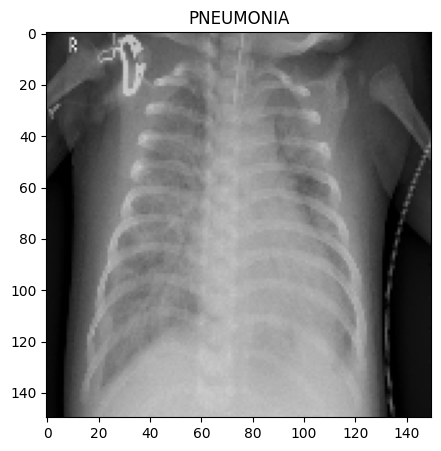

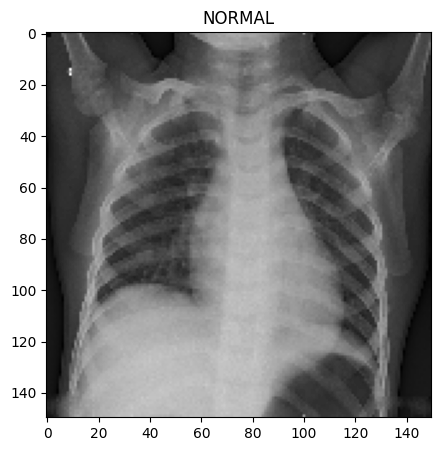

In [6]:
# Look at first training image
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

# Look at final training image
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [7]:
x_train = []
y_train = []

x_test_B = []
y_test_B = []


for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test_B.append(feature)
    y_test_B.append(label)
    
random_sample = 100

x_train, x_test_val, y_train, y_test_val   = train_test_split(x_train, y_train, test_size=0.1, random_state=random_sample)
x_val,   x_test_A,   y_val,   y_test_A     = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=random_sample)



In [8]:
print(len(x_train))
print(len(x_val))
print(len(x_test_A))
print(len(x_test_B))
print(x_train[0].shape)

4694
261
261
624
(150, 150)


In [9]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test_A = np.array(x_test_A) / 255
x_test_B = np.array(x_test_A) / 255

In [10]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test_A = x_test_A.reshape(-1, img_size, img_size, 1)
y_test_A = np.array(y_test_A)

x_test_B = x_test_B.reshape(-1, img_size, img_size, 1)
y_test_B = np.array(y_test_B)

In [11]:
for dataset, dataset_name in zip([y_train,y_val,y_test_A,y_test_B],["y_train","y_val","y_test_A","y_test_B"]):
    pneumnoia_count = 0
    normal_count = 0
    for label in dataset:
        if(label == 0): # A 0 is the pneumonia class
            pneumnoia_count += 1
        else:
            normal_count += 1
    
    print(f"\n{dataset_name}")
    print("Pneumonia Cases: ", pneumnoia_count)
    print("Normal Cases: ", normal_count)


y_train
Pneumonia Cases:  3476
Normal Cases:  1218

y_val
Pneumonia Cases:  207
Normal Cases:  54

y_test_A
Pneumonia Cases:  192
Normal Cases:  69

y_test_B
Pneumonia Cases:  390
Normal Cases:  234


In [12]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 64)        2

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
best_model = keras.callbacks.ModelCheckpoint(filepath='models/best_model.h5', save_best_only=True)

class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 5 == 0:  # or save after some epoch, each k-th epoch etc.
            self.model.save(f"models/model_epoch_{epoch}.h5")


epoch_saver = CustomSaver()
#epoch_saver = keras.callbacks.ModelCheckpoint(filepath="models/model_epoch_{epoch:02d}.h5", save_best_only=False, save_freq = 2)


In [14]:
history = model.fit(x_train,y_train, batch_size = 32, epochs = 60 , validation_data = (x_val, y_val) ,callbacks = [learning_rate_reduction,best_model,epoch_saver],)

Epoch 1/60
147/147 [==============================] - 71s 476ms/step - loss: 0.3901 - accuracy: 0.8811 - val_loss: 4.6737 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 2/60


c:\Users\Will Poulett\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


147/147 [==============================] - 72s 488ms/step - loss: 0.1347 - accuracy: 0.9553 - val_loss: 8.3184 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 3/60
147/147 [==============================] - ETA: 0s - loss: 0.1013 - accuracy: 0.9683
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
147/147 [==============================] - 73s 494ms/step - loss: 0.1013 - accuracy: 0.9683 - val_loss: 4.3560 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 4/60
147/147 [==============================] - 70s 476ms/step - loss: 0.0419 - accuracy: 0.9849 - val_loss: 0.4017 - val_accuracy: 0.9157 - lr: 3.0000e-04
Epoch 5/60
147/147 [==============================] - 70s 477ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.3890 - val_accuracy: 0.9349 - lr: 3.0000e-04
Epoch 6/60
 88/147 [================>.............] - ETA: 27s - loss: 0.0184 - accuracy: 0.9940